# Principales statistiques descriptives

On va récupérer le fichier `world-alcohol.csv` dans `Python/1. Analyse de données/Data`

In [5]:
!pwd

/home/elka/IA-P2-Euskadi/Maths/Statistiques descriptives


In [7]:
import numpy as np
data = np.genfromtxt('../../Python/1. Analyse de données/Data/world-alcohol.csv', delimiter=',', dtype='U75', skip_header=1)
data[:8,:]

array([['1986', 'Western Pacific', 'Viet Nam', 'Wine', '0'],
       ['1986', 'Americas', 'Uruguay', 'Other', '0.5'],
       ['1985', 'Africa', "Cte d'Ivoire", 'Wine', '1.62'],
       ['1986', 'Americas', 'Colombia', 'Beer', '4.27'],
       ['1987', 'Americas', 'Saint Kitts and Nevis', 'Beer', '1.98'],
       ['1987', 'Americas', 'Guatemala', 'Other', '0'],
       ['1987', 'Africa', 'Mauritius', 'Wine', '0.13'],
       ['1985', 'Africa', 'Angola', 'Spirits', '0.39']], dtype='<U75')

In [8]:
data.shape

(3257, 5)

## 1. Variables quantitatives

On va regarder les variables quantitatives : ici, c'est la consommation.

### 1.1 Valeurs manquantes

In [15]:
# nombre de valeurs manquantes
filtre_na = data[:,-1]==''
filtre_na.sum()

222

In [16]:
222/3257

0.06816088424930918

In [21]:
# pour l'instant on va supprimer les lignes correspondantes
data2 = data[~filtre_na]
data2.shape

(3035, 5)

In [26]:
# récupération et conversion de la consommation
consommation = data2[:,-1].astype(float)
consommation

array([0.  , 0.5 , 1.62, ..., 2.54, 0.  , 5.15])

### 1.2 Moyenne

In [27]:
consommation.mean()

1.2879604612850082

In [28]:
np.mean(consommation)

1.2879604612850082

In [29]:
np.average(consommation)

1.2879604612850082

In [30]:
# pour lister les méthodes d'un objet
dir(consommation)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

### 1.3 Médiane

In [31]:
np.median(consommation)

0.31

### 1.4 Maximum et minimum

In [33]:
print(consommation.max(), ' et ', consommation.min())

13.5  et  0.0


### 1.5 Mode

In [34]:
# import de la librairie stats
import scipy.stats as stat

In [35]:
stat.mode(consommation)

ModeResult(mode=array([0.]), count=array([713]))

In [36]:
filtre = consommation>0
conso2 = consommation[filtre]
stat.mode(conso2)

ModeResult(mode=array([0.01]), count=array([163]))

### 1.6 Statistiques de dispersion

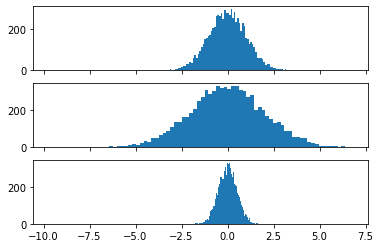

In [49]:
# illustration de la dispersion
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].hist(np.random.normal(0,1,8000), bins=80)
ax[1].hist(np.random.normal(0,2,8000), bins=80)
ax[2].hist(np.random.normal(0,0.5,8000), bins=80);

In [50]:
np.std(consommation)

1.9637479274729108

In [51]:
np.var(consommation)

3.8563059226541525

In [52]:
np.var(consommation) - np.std(consommation)**2

0.0

### 1.7 Quantiles

In [ ]:
# médiane
np.quantile(consommation, 0.5)

In [55]:
# quartile
np.quantile(consommation, [0.25,0.5,0.75])

array([0.01, 0.31, 1.89])

In [65]:
#ou
np.percentile(consommation, [25, 50, 75])

array([0.01, 0.31, 1.89])

In [60]:
# déciles
np.quantile(consommation, np.linspace(0.1,0.9,9))

array([0.   , 0.   , 0.02 , 0.106, 0.31 , 0.81 , 1.508, 2.32 , 3.762])

In [61]:
# percentiles
np.quantile(consommation, np.linspace(0.01,0.99,99))

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.01  ,
       0.01  , 0.01  , 0.01  , 0.01  , 0.02  , 0.02  , 0.02  , 0.03  ,
       0.04  , 0.04  , 0.05  , 0.06  , 0.07  , 0.08  , 0.09  , 0.106 ,
       0.12  , 0.13  , 0.14  , 0.16  , 0.183 , 0.2   , 0.24  , 0.26  ,
       0.28  , 0.31  , 0.34  , 0.37  , 0.4102, 0.46  , 0.5   , 0.56  ,
       0.6   , 0.65  , 0.74  , 0.81  , 0.86  , 0.92  , 0.9742, 1.02  ,
       1.12  , 1.19  , 1.2678, 1.34  , 1.4246, 1.508 , 1.61  , 1.67  ,
       1.74  , 1.8   , 1.89  , 1.95  , 2.04  , 2.1252, 2.22  , 2.32  ,
       2.43  , 2.5588, 2.65  , 2.7756, 2.91  , 3.0324, 3.15  , 3.3692,
       3.5926, 3.762 , 4.1294, 4.3828, 4.8062, 5.2088, 5.735 , 6.54  ,
       6.9998, 7.5   , 8.3498])

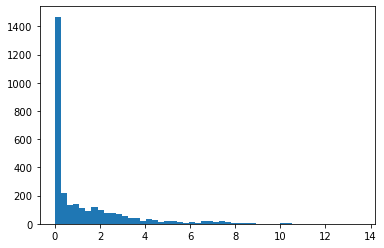

In [63]:
plt.hist(consommation, bins=50);